In [1]:
import os
import scipy.stats
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import decimal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker


In [2]:
np.random.seed(123)

Pequeño comentario del codigo del profe. Con ## es mi comentario.  
  
Acá lo que va a hacer el profe es mostrar 2 metodos.  
Primero se trajo "from scipy.stats import norm" que es la distribución normal en scipy. Las distribuciones tienen varios métodos. Le podes pedir la densidad, los percentiles, la acumulada, momentos, podes samplear de la distribución, de todo. Por ahora va a usar dos métodos: cdf y ppf.
Cdf es la funcion de distribución acumulada. Sería algo así como: "Dado un valor en una normal ¿Cuál es el área bajo la curva que te queda atrás de ese punto?"   
O bien "¿cual es la proba de samplear un valor más chico que este?"  
Después tenés ppf que es lo contrario: ¿cual es el numero que te deja por atrás esa cantidad de área? O sea, el estás pidiendo el percentil. Por ejemplo, si yo le pido ppf(.5) le estoy pidiendo el valor que deja por detrás (o sea el valro que es mayor o igual) al 50% de la distribución. Como es una normal estandar, me tiene que devolver 0.
Si yo le pido el cdf(1), le estoy pidiendo el área debajo de la curva por detrás de 1 (o sea, la probabilidad de samplear un valor menor o igual a 1). ME va a dar cerca de .84 (porque es una normal estandar).
  
si no le pasas otro parámetro, te da una normal estandar. Pero podés jugar con los otros dos parámetros loc y scale. Loc te permite cambiar la media de la distribución. Scale te permite cambiar el desvío de la distribución.

In [3]:
## agrego estos dos ejemplos para cerrar el comentario de arriba:
## cdf(1)
print(norm.cdf(1))

## ppf(.5)
print(norm.ppf(.5))

0.8413447460685429
0.0


In [4]:
# Quantile

## acá muestra ppf y cdf:
print(round(norm.ppf(0.025),4))
print('prob: ' + str(round(norm.cdf(-1.96),4))) # Excel: DISTR.NORM.ESTAND.N(-1.96;VERDADERO)
# Equivalent

## y como la ppf es la inversa de la cdf:
print(round(norm.cdf(norm.ppf(0.025)),4))

-1.96
prob: 0.025
0.025


In [5]:
## muestra ppf y cdf de nuevo para 0.1, 0.01 y de nuevo muestra que cdf(ppf(x)) = x
print(round(norm.ppf(0.1),4)) # Excel: DISTR.NORM.ESTAND.INV(0,025)
print(round(norm.ppf(0.01),4))
print(round(norm.cdf(norm.ppf(0.1)),4))

-1.2816
-2.3263
0.1


In [6]:
## define media y desvio
mu, sigma = 0.0, 0.03903 # mean and standard deviation
#mu, sigma = 0, 1 # mean and standard deviation

## samplea de una normal con media mu, desvio sigma 
## acá lo hace con numpy en vez de con scipy. 
## Tambien podría haber usado la norm del punto anterior
## con norm.rvs
simulation_rn = np.random.normal(mu, sigma, 9000) ## samplea 9000 valores de una normal

## chequea el error entre la media real (el parámetro) y la media que obtiene de la distribución
## que simula. A un N grande, la media muestral se aproxima al parámetro (LLN)
# Verify the mean and the variance:
print(abs(mu - np.mean(simulation_rn)))

## lo mismo para el desvío. EL error con 9000 muestras es bastante chico
print(abs(sigma - np.std(simulation_rn, ddof=1)))

0.0004890374683290222
0.0001146443371595196


In [7]:
## acá lo que hace es restarle la media y dividir por el desvío
## o sea, estandarizamos. (seguro alguno le dice de otra forma, lo escuché de mil maneras)
data = -0.05
transf = (data-mu)/sigma
print(transf)

-1.2810658467845246


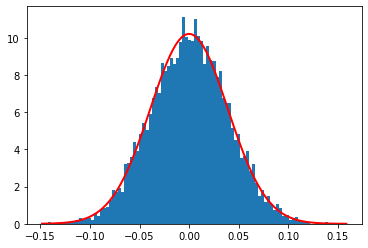

In [8]:
# Plot
## hacemos un histograma con los 9000 sampleos que hicimos recien
count, bins, ignored = plt.hist(simulation_rn, 100, density=True)
## 

## esta es una forma increiblemente complicada de dibujar una curva normal arriba del histograma
## lo que tenemos en el segundo parámetro es la función de la normal. 
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')


## una forma mas amigable de hacerlo es usando scipy:
## x = np.linspace(norm(loc=mu, scale=sigma).ppf(0.001),
##                norm(loc=mu, scale=sigma).ppf(0.999), 100)
## rv = norm(loc=mu, scale=sigma)
## plt.plot(x, rv.pdf(x), 'k-', lw=2, color="red")

In [9]:
## calcula la cdf de "data" que es ese -0.05.
## como le pasa el parámetro loc (mu) y scale (sigma)
## no es necesario normalizarlo (no le resta mu y lo divide por sigma)

## lo que calcula acá es la proba de obtener un valor más chico que -0.05
prob = scipy.stats.norm.cdf(data, mu, sigma)

## la probabilidad de samplear un valor más chico que -0.05 es del 10%
## si lo pensamos como retornos, tengo un 10% de tener una pérdida del 5% o más.
print(prob)

0.10008526936504192


In [10]:
## y también al revés: cual es el valor que yo se que tengo solo .10 de proba de perder más que eso?
print(round(norm.ppf(0.1, mu, sigma),4)) ## 5%

## o sea, con ppf(.1) yo lo que quiero saber es: con un .10 de proba ¿cuanto es como mucho lo que debería perder?
## bueno, acá, un -5%.  Solo 1 de cada 10 veces deberías ver que perdés más del 5%

-0.05


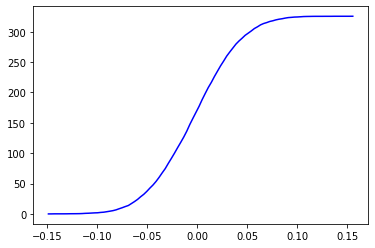

In [11]:
## count sale del hist. Son los conteos para cada bin. 
## O sea, la altura de las barritas del histograma
## cumsum lo que hace es una suma acumulada

## o sea, lo que tenemos acá es la distribución acumulada 
## (la empírica, que sale del sampleo)
cumulative = np.cumsum(count)

## la ploteamos
plt.plot(bins[:-1], cumulative, c='blue')

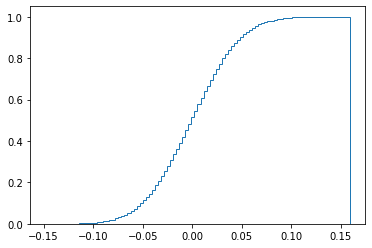

In [12]:
## otra forma es pedir directo el histograma acumulado
## como es un histograma, tiene que cerrar por ambos lados. 
## Por eso vemos esa caida al final de todo
## para matplotlib es lo mismo que hacer un hist pero le pasas cumulative = true

# plot the cumulative histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(simulation_rn, 100, density=True, histtype='step',cumulative=True, label='Empirical')

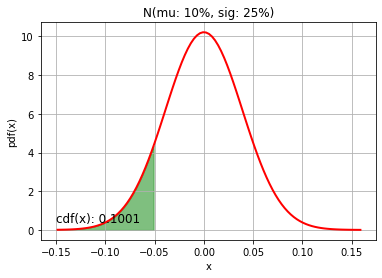

In [13]:
## ahora va a plotear una normal estandar y va a mostrar el área acumulada detrás de -0.05

# for fill_between
fig, ax = plt.subplots()

## plotea una normal(mu, sigma)
px=np.arange(-.15,data ,0.001)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
#ax.set_ylim(0,1.6)

## rellena en verde el area detras de 0.05
ax.fill_between(px,norm.pdf(px,loc=mu, scale=sigma), alpha=0.5, color='g')

## agrega texto
# for text
ax.text(-0.15,0.4,f"cdf(x): {round(prob,4)}", fontsize=12) ## acomodo un poco esto
ax.set_title("N(mu: 10%, sig: 25%)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for text
##ax.text(-0.15,0.2,round(prob,4)*100, fontsize=10)

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(min(px), 1, 0.1))
#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=None, symbol='%'))


In [14]:
### acá repite lo mismo pero con otra media y desvio
mu, sigma = 0.10, 0.25 # mean and standard deviation
#mu, sigma = 0, 1 # mean and standard deviation

## samplea 9000 valores de una normal(0.1, 0.25)
simulation_rn = np.random.normal(mu, sigma, 9000)

## chequea que media y desvio de la muestra le den parecido a los parámetros:
# Verify the mean and the variance:
print(abs(mu - np.mean(simulation_rn)))
print(abs(sigma - np.std(simulation_rn, ddof=1)))

0.004026356380356519
0.0002668648553803554


In [15]:
## define "data" como -0.025, despues lo cambia a 0.1 y lo estandariza
data = -0.025
data = 0.1 ## esta es la media que le definió a la normal de la que está sampleando
## así que estandarizando debería darle 0:
transf = (data-mu)/sigma
print(transf)

0.0


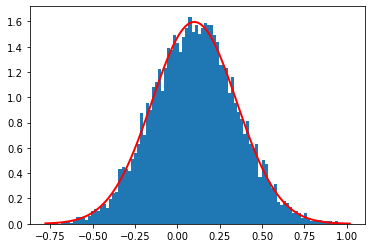

In [16]:
## repite el mismo plot de arriba: un histograma y arriba le dibuja la normal

# Plot
count, bins, ignored = plt.hist(simulation_rn, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')

In [17]:
## calcula la probabilidad de samplear un valor menor a data 
##(que habíamos visto que era = mu, así que debería ser .5)
prob = scipy.stats.norm.cdf(data, mu, sigma)
print(prob)


0.5


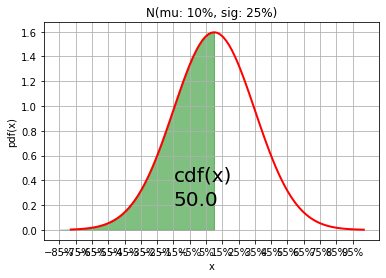

In [18]:
### repite el gráfico de area acumulada:

# for fill_between
fig, ax = plt.subplots()
px=np.arange(-.85,data ,0.001)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
ax.fill_between(px,norm.pdf(px,loc=mu, scale=sigma), alpha=0.5, color='g')
# for text
ax.text(-0.15,0.4,"cdf(x)", fontsize=20)
ax.set_title("N(mu: 10%, sig: 25%)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for text
ax.text(-0.15,0.2,round(prob,4)*100, fontsize=20)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(min(px), 1, 0.1))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=None, symbol='%'))


In [19]:
## define una media y un desvío:
muND, sigmaND = 0, 1 # mean and standard deviation

## con media 0 y desvio 1 tenemos la normal estandar

## samplea de uina normal con media muND y desvío sigmaND
## 9000 muestras:
simulation_ND = np.random.normal(muND, sigmaND, 9000)

## chequea de nuevo que le de parecido media y desvio muestral
# Verify the mean and the variance:
print(abs(muND - np.mean(simulation_ND)))

## la unica modificacion es que le agrega ddof=1
## esto es para el denominador del desvío que es N - ddof
## seteando ddof = 1, haces que el calculo del desvío sea con N-1 en vez de con N
print(abs(sigmaND - np.std(simulation_ND, ddof=1)))

0.012740067114895462
0.004801929350917611


In [20]:
## setea dataND como -1, despues lo cambia a -0.5 y despues lo cambia a -1.96
dataND = -1
dataND = -0.5
dataND = -1.96

## estandariza
transfND = (dataND-muND)/sigmaND
print(transfND)

-1.96


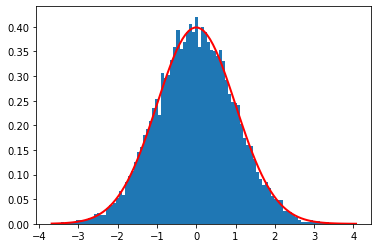

In [21]:
## hace el mismo gráfico con un histograma y le plotea una normal arriba
# Plot
countND, binsND, ignoredND = plt.hist(simulation_ND, 100, density=True)
plt.plot(binsND, 1/(sigmaND * np.sqrt(2 * np.pi)) * np.exp( - (binsND - muND)**2 / (2 * sigmaND**2)), linewidth=2, color='r')

In [22]:
## calcula la cdf de dataND (que había quedado en -1.96)
probND = scipy.stats.norm.cdf(dataND, muND, sigmaND)
## es decir, cual es la proba de sacar un valor a -1.96 de una normal estandar.
## sabemos que nos tiene que dar aprox 0.025
print(probND)

0.024997895148220435


Text(-0.15, 0.2, '2.5')

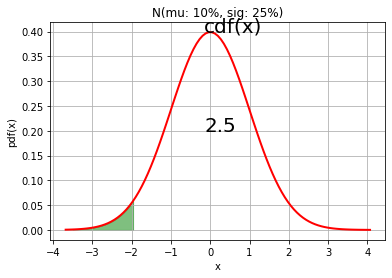

In [23]:
## y hace de nuevo el gráfico de área acumulada

# for fill_between
figND, axND = plt.subplots()
pxND=np.arange(-3.5,dataND ,0.001)
axND.plot(binsND, 1/(sigmaND * np.sqrt(2 * np.pi)) * np.exp( - (binsND - muND)**2 / (2 * sigmaND**2)), linewidth=2, color='r')
axND.fill_between(pxND,norm.pdf(pxND,loc=muND, scale=sigmaND), alpha=0.5, color='g')
# for text
axND.text(-0.15,0.4,"cdf(x)", fontsize=20)
axND.set_title("N(mu: 10%, sig: 25%)")
axND.set_xlabel('x')
axND.set_ylabel('pdf(x)')
axND.grid(True)
# for text
axND.text(-0.15,0.2,round(probND,4)*100, fontsize=20)